In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format

In [26]:
def seed_read_results(env_name, files, keys, seeds):
    parent = "results_flatworld/" + env_name + "/"
    final_dfs = {}

    for seed in seeds:
        all_dfs = []
        for file in files:
            cur_name = parent + str(seed) + "/" + file + ".csv"
            cur_df = pd.read_csv(cur_name)
            cur_df.set_index(["Task Set", "Task ID"], inplace=True)
            
            if "Successes" in cur_df.columns:
                cur_df["Successes"] *= (100/float(50))
    
            if "Avg Discounted Return" in cur_df.columns:
                cur_df.drop(columns=["Avg Steps"], inplace=True)
    
            all_dfs.append(cur_df)
    
        df_concat = pd.concat(all_dfs, axis=1, keys=keys)
        final_dfs[seed] = df_concat

    df_mean = pd.concat(final_dfs.values()).groupby('Task ID').mean()
    df_std = pd.concat(final_dfs.values()).groupby('Task ID').std()

    # df_mean = sum(final_dfs.values()) / len(final_dfs)
    return final_dfs, df_mean, df_std

In [35]:
def plot_results(env, exp_list, labels, colors, seed_list=None):
    
    if seed_list is None:
        seed_list = [list(range(1, 6)) for _ in range(len(exp_list))]

    for i, (exp, seeds) in enumerate(zip(exp_list, seed_list)):
        dfs = [pd.read_csv(f"eval_results/{env}/{exp}/{i}.csv", header=0) for i in seeds]

        mean_df = pd.concat(dfs).groupby(level=0).mean()
        std_df = pd.concat(dfs).groupby(level=0).std()

        plt.plot(mean_df.index, mean_df["return"], label=labels[i], color=colors[i])  # Mean line
        plt.fill_between(mean_df.index,
                         mean_df["return"] - std_df["return"],
                         mean_df["return"] + std_df["return"],
                         color=colors[i], alpha=0.2)

    plt.xlabel("Number of Training Steps (/229376)")
    plt.ylabel("ADR")
    plt.title("ADR over time")
    plt.legend(title="Models")
    plt.show()

In [21]:
with open('eval_datasets/FlatWorld-v0/finite_tasks.txt', 'r') as file:
    for line in file:
        print(line[:-1])

Reach Avoid General
RA_1 (F ((red & magenta) & F ((blue & green) & F yellow)))
RA_2 (F (orange & (!red U magenta)))
RA_3 ((!red U (green & blue & aqua)) & F (orange & (F (red  &magenta))))
RA_4 (((!yellow & !orange) U (green & blue)) & (!green U magenta))
RA_5 ((blue => F magenta) U (yellow | ((green & blue) & F orange))


In [37]:
env_name = 'FlatWorld-v0'

files = [env_name + '_deepsets_stay2', env_name + '_gcn_update_22', env_name + '_deepsets_update2']
keys = ['DeepSets (C_1)', 'GCN (C_4)', 'DeepSets (C_4)']
seeds = range(1, 6)

dfs, dfs_mean, dfs_std = seed_read_results(env_name, files, keys, seeds)

dfs_mean

DeepSets (C_1)                       GCN (C_4)                        \
             Successes Avg Discounted Return Successes Avg Discounted Return   
Task ID                                                                        
RA_1             94.40                  0.24    100.00                  0.26   
RA_2             63.20                  0.25     76.40                  0.33   
RA_3             90.80                  0.27     90.00                  0.27   
RA_4             84.00                  0.41     86.00                  0.43   
RA_5             93.20                  0.49     90.80                  0.50   

        DeepSets (C_4)                        
             Successes Avg Discounted Return  
Task ID                                       
RA_1            100.00                  0.26  
RA_2            100.00                  0.42  
RA_3             95.60                  0.29  
RA_4             87.60                  0.43  
RA_5             97.60                  0.52

In [38]:
dfs_std

DeepSets (C_1)                       GCN (C_4)                        \
             Successes Avg Discounted Return Successes Avg Discounted Return   
Task ID                                                                        
RA_1             12.52                  0.03      0.00                  0.00   
RA_2             49.10                  0.20     42.95                  0.18   
RA_3              6.42                  0.02      2.83                  0.01   
RA_4              6.78                  0.03      4.00                  0.02   
RA_5             11.97                  0.06     18.42                  0.07   

        DeepSets (C_4)                        
             Successes Avg Discounted Return  
Task ID                                       
RA_1              0.00                  0.00  
RA_2              0.00                  0.01  
RA_3              3.58                  0.01  
RA_4              4.77                  0.02  
RA_5              4.34                  0.03

In [23]:
with open('eval_datasets/FlatWorld-v0/infinite_tasks.txt', 'r') as file:
    for line in file:
        print(line[:-1])

Reach Avoid Inifnite
RAI_1 ((G (F (blue & green))) & (G (F (red & magenta))))
RAI_2 ((G (F (aqua & blue))) & (G (F red)) & (G (F yellow)) & (G (!green)))
RAI_3 (F (G blue))
RAI_4 ((F (G blue)) & (F yellow & (F green)))
RAI_5 ((F (G magenta)) & (G (!yellow)))
RAI_6 (G ((green | yellow) => (F blue)) & (F (G (green | magenta)))


In [42]:
files_inf = [env_name + '_deepsets_stay_inf2', env_name + '_gcn_update_2_inf2', env_name + '_deepsets_update_inf2']

dfs_inf, dfs_mean_inf, dfs_std_inf = seed_read_results(env_name, files_inf, keys, seeds)

dfs_mean_inf


,DeepSets (C_1),GCN (C_4),DeepSets (C_4)
,Accepting visits,Accepting visits,Accepting visits
Task ID,,,
RAI_1,12.21,12.19,12.17
RAI_2,3.30,2.48,2.22
RAI_3,483.21,485.20,481.39
RAI_4,439.57,443.74,447.96
RAI_5,433.78,453.38,334.43
RAI_6,28.92,100.74,51.69


In [43]:
dfs_std_inf

,DeepSets (C_1),GCN (C_4),DeepSets (C_4)
,Accepting visits,Accepting visits,Accepting visits
Task ID,,,
RAI_1,0.55,0.63,0.86
RAI_2,2.12,1.89,2.15
RAI_3,4.57,0.43,8.38
RAI_4,13.62,2.91,1.73
RAI_5,73.66,28.10,140.98
RAI_6,47.74,165.39,61.30


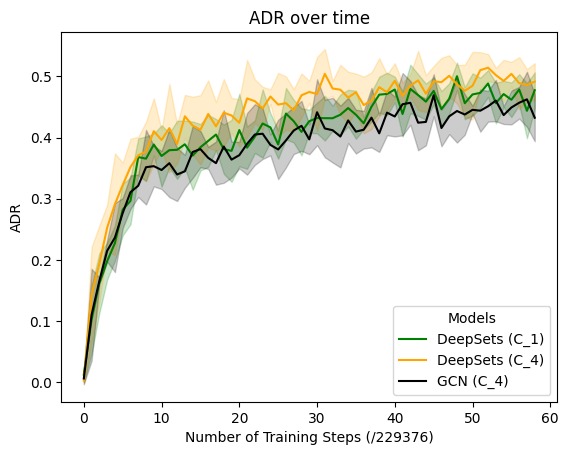

In [36]:
plot_results('FlatWorld-v0', ['deepsets_stay', 'deepsets_update', 'gcn_update_2'],
             ['DeepSets (C_1)', 'DeepSets (C_4)', 'GCN (C_4)'],
             ['green', 'orange', 'black'])